<a href="https://colab.research.google.com/github/Brutusa/python-machine-learning/blob/main/ClusteringandEnsemblePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

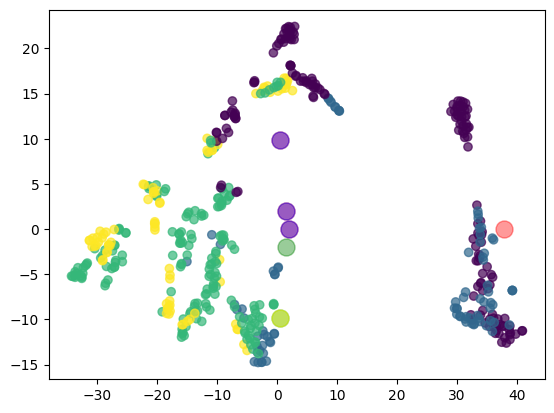

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
data2 = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Normalize a full vector
def normalize(v, min, max):
  # Min Max Normalization formula
  new_v = (v - min)/ (max-min)
  return new_v

# K means clustering
# step 1: randomly choose centroids
# 4 centroids (4 clusters)
centroids = np.array([random.choice(data), random.choice(data), random.choice(data), random.choice(data)])
norm_data = normalize(data, np.min(data), np.max(data))
distances = np.empty((len(data), 4))
cluster_number = np.empty((len(data)))


# step 2: compute euclidean distance
for x in range(len(data)):
  point = data[x]
  curr_cluster = 0
  sum1 = 0
  sum2 = 0
  sum3 = 0
  sum4 = 0

  for feature in range(len(data[0])):
    sum1 += ((point[feature]-centroids[0][feature])**2)
    sum2 += ((point[feature]-centroids[1][feature])**2)
    sum3 += ((point[feature]-centroids[2][feature])**2)
    sum4 += ((point[feature]-centroids[3][feature])**2)

  distance1 = np.sqrt(sum1)
  distance2 = np.sqrt(sum2)
  distance3 = np.sqrt(sum3)
  distance4 = np.sqrt(sum4)

  distances[x, 0] = distance1
  distances[x, 1] = distance2
  distances[x, 2] = distance3
  distances[x, 3] = distance4

  curr_cluster = cluster_number[x] = np.argmin(distances[x])

  if curr_cluster == 0:
    np.append(clustered_data1, point)
  elif curr_cluster == 1:
    np.append(clustered_data2, point)
  elif curr_cluster == 2:
    np.append(clustered_data3, point)
  elif curr_cluster == 3:
    np.append(clustered_data4, point)

  # step 3: calculate new centroid values
  for feature in range(len(centroids[curr_cluster])):
    centroids[curr_cluster][feature] = (centroids[curr_cluster][feature] + point[feature])/2

tsne = TSNE(n_components=2)
new_data = tsne.fit_transform(norm_data)

plt.scatter(new_data[:,0], new_data[:,1], c=cluster_number, alpha=0.7)
plt.scatter(centroids[0:,0]*7, centroids[0:,1]*7, color='red', s=150, alpha=0.4)
plt.scatter(centroids[1:,0]*7, centroids[1:,1]*7, color='blue', s=150, alpha=0.4)
plt.scatter(centroids[2:,0]*7, centroids[2:,1]*-7, color='green', s=150, alpha=0.4)
plt.scatter(centroids[3:,0]*7, centroids[3:,1]*-7, color='yellow', s=150, alpha=0.4)
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Combine features abd labels into a single array
X_combined = np.column_stack((X, y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3)

# Create TreeNode class for organization purposes
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []
        self.label = None

# Functions for decision tree:
def should_be_leaf_node(X):
    return len(np.unique(X[:, -1])) == 1

def majority_label(X):
    unique, counts = np.unique(X[:, -1], return_counts=True)
    return unique[np.argmax(counts)]

def select_best_splitting_attribute(X):
    num_features = X.shape[1] - 1
    best_gini = float('inf')
    best_feature = None

    # for each feature, calculate the gini
    for feature in range(num_features):
        gini = calculate_gini_index(X, feature)

        # ensure the best feature is really the best
        if gini < best_gini:
            best_gini = gini
            best_feature = feature

    return best_feature

# gini index calculation function
def calculate_gini_index(X, feature):
    total = len(X)
    gini_index = 0

    feature_values = np.unique(X[:, feature])

    for value in feature_values:
        subset = X[X[:, feature] == value]
        proportion = len(subset) / total
        gini = 1.0 - sum((np.sum(subset[:, -1] == i) / len(subset)) ** 2 for i in np.unique(subset[:, -1]))
        gini_index += proportion * gini

    return gini_index

# def make_tree(X):
def make_tree(X):
    # node = TreeNode(X)
    node = TreeNode(X)

    # if should_be_leaf_node(X):
    if should_be_leaf_node(X):
        # node.label = majority_label(X)
        node.label = majority_label(X)
    else:
        # a = select_best_splitting_attribute(X)
        best_attribute = select_best_splitting_attribute(X)
        feature_values = np.unique(X[:, best_attribute])

        # for v in values(a):
        for value in feature_values:
            # 𝑋𝑣 ={𝑥 |∈ 𝑋 𝑥[ ]𝑎 == 𝑣}
            Xv = X[X[:, best_attribute] == value]
            # node.children.append(make_tree(𝑋𝑣))
            node.children.append(make_tree(Xv))

    return node

# Build the decision tree
root_node = make_tree(X_train)

def predict(node, sample):
    if node.label is not None:
        return node.label

    feature_val = sample[node.data.shape[1] - 1]

    for child in node.children:
        if child.data[0][node.data.shape[1] - 1] == feature_val:
            return predict(child, sample)


# Predict on the test set
for sample in X_test:
  y_pred = [predict(root_node, sample)]

# Calculate accuracy
def accuracy():
  accuracy = np.sum(y_pred == y_test) / len(y_test)
  return accuracy * 100

print("Decision tree accuracy is {:.1f}".format(accuracy()),"%")

Decision tree accuracy is 44.4 %


In [ ]:
from math import exp
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

# Import data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
cancer_categories = cancer.target_names
cancer_features = cancer.feature_names

# Split data (maitain specific data split)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.70, test_size=.30, random_state=20)

# Split data (randomly organize data split)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.70, test_size=.30)

# Get data's dimensions
X_train_num_instances = X_train.shape[0]
X_train_num_features = X_train.shape[1]

X_test_num_instances = X_test.shape[0]
X_test_num_features = X_test.shape[1]

y_train_num_instances = y_train.shape[0]

y_test_num_instances = y_test.shape[0]

# Learning rate
learning_rate = 0.05

# Bias Neuron
bias_neuron = 1

# Set starting arrays to all zeroes
parameter_vector = np.zeros((X_train_num_features + 1), dtype=np.float64)
train_instance_factor = np.zeros((X_train_num_instances), dtype=np.float64)
logistic_regression_array = np.zeros((X_train_num_instances), dtype=np.float64)
h_theta_array = np.zeros((X_test_num_instances), dtype=np.float64)
predicted_class = np.zeros((X_test_num_instances), dtype=np.int64)
test_instance_factor = np.zeros((X_test_num_instances), dtype=np.float64)

# Dataset copy for use with bias
X_train_bias = np.zeros((X_train_num_instances, X_train_num_features), dtype=np.float64)
X_test_bias = np.zeros((X_test_num_instances, X_train_num_features), dtype=np.float64)
np.copyto(X_train_bias, X_train)
np.copyto(X_test_bias, X_test)

y_train_bias = np.zeros((y_train_num_instances), dtype=np.float64)
y_test_bias = np.zeros((y_test_num_instances), dtype=np.float64)

np.copyto(y_train_bias, y_train)
np.copyto(y_test_bias, y_test)

# Add bias nueron to front of datasets
X_train_bias = np.insert(X_train_bias, 0, bias_neuron, axis=1)
X_test_bias = np.insert(X_test_bias, 0, bias_neuron, axis=1)

# Get dimensions of new datasets
X_train_bias_num_instances = X_train_bias.shape[0]
X_train_bias_num_features = X_train_bias.shape[1]

X_test_bias_num_instances = X_test_bias.shape[0]
X_test_bias_num_features = X_test_bias.shape[1]

y_train_bias_num_instances = y_train_bias.shape[0]

y_test_bias_num_instances = y_test_bias.shape[0]


# Normalize a full vector
def normalize(v, min, max):
  # Min Max Normalization formula
  new_v = (v - min)/ (max-min)
  return new_v

# Normalize dataset when called
def normalize_vectors():
  # Normalize the training vector
  for instance_X in range(X_train_num_instances):
    # normalize everything from index 1 to end (skipping bias neuron)
    for feature_X in range(1, X_train_num_features + 1):
      X_train_bias[instance_X, feature_X] = normalize(X_train_bias[instance_X, feature_X], np.min(X_train_bias), np.max(X_train_bias))

  # Normalize the testing vector
  for instance_X in range(X_test_num_instances):
     # normalize everything from index 1 to end (skipping bias neuron)
    for feature_X in range(1, X_test_num_features + 1):
      X_test_bias[instance_X, feature_X] = normalize(X_test_bias[instance_X, feature_X], np.min(X_test_bias), np.max(X_test_bias))
  return None


#-------------------------------------------------------------------------------------#
## LOGISTIC REGRESSION ALGORITHM ##

# Train the model
def train_logistic_regression():
  # For every example in our training dataset
  for instance_X in range(X_train_num_instances):
  # And for every feature
    for feature_X in range(X_train_num_features+1):
      # 1st: Calculate Theta-Transposed X for each instance
      train_instance_factor[instance_X] += (parameter_vector[feature_X] * X_train_bias[instance_X, feature_X])

    # And for every feature after adding up the factor
    for feature_X in range(X_train_num_features+1):
      # 2nd: Calculate gradient descent for every instance and for every feature
      logistic_regression_array[instance_X] = ((1/(1 + (np.exp(-(train_instance_factor[instance_X]))))) - y_train[instance_X]) * X_train_bias[instance_X, feature_X]

      # 3rd: Compute full formula for every feature
      parameter_vector[feature_X] = parameter_vector[feature_X] - (learning_rate*(np.sum(logistic_regression_array[instance_X])))
  return None


# Predict the targets
def test_logistic_regression():
  # For every example in our training dataset
  for instance_X in range(X_test_num_instances):
    # And for every feature
    for feature_X in range(X_test_num_features+1):
     # 1st: Calculate Theta-Transposed X for each instance
      test_instance_factor[instance_X] += (parameter_vector[feature_X] * X_test_bias[instance_X, feature_X])
    # And for every feature
    for feature_X in range(X_test_num_features+1):
      # 2nd: Calculate the target output
      h_theta_array[instance_X] = 1/(1 + (np.exp(-(test_instance_factor[instance_X]))))

      # 3rd: Predict class
      if h_theta_array[instance_X] >= 0.5:
        predicted_class[instance_X] = 1
      else:
        predicted_class[instance_X] = 0
  return None

# Get prediction accuracy for logistic regression
def get_logistic_accuracy():
  correct = 0
  for instance_X in range(X_test_num_instances):
    if predicted_class[instance_X] == y_test[instance_X]:
      correct += 1
  return (correct/len(predicted_class))*100


#-------------------------------------------------------------------------------------#
## FEED FORWARD NEURAL NETWORK ##

# 1. Initialize the weights and biases
# Array SHx is the hidden layer array which stores all the weights from inputs x
# b1 bias is within each individual hidden layer array at index 0
b2_bias_weight = (1 - (-1)) * np.random.random_sample() + (-1)

SH1wx = np.zeros((X_train_bias_num_features), dtype=np.float128)
SH2wx = np.zeros((X_train_bias_num_features), dtype=np.float128)
SH3wx = np.zeros((X_train_bias_num_features), dtype=np.float128)
SH4wx = np.zeros((X_train_bias_num_features), dtype=np.float128)
target_output = None

# pass weights from Logistic Regression's parameter vector (for ensemble model)
for feature_X in range(X_train_bias_num_features):
  SH1wx[feature_X]= parameter_vector[feature_X]
  SH2wx[feature_X]= parameter_vector[feature_X]
  SH3wx[feature_X]= parameter_vector[feature_X]
  SH4wx[feature_X]= parameter_vector[feature_X]

# SOx is output and wx is the weight from the hidden layer (between -1 and 1)
SO1wx = np.zeros(5, dtype=np.float128)

for hidden_weight_x in range(5):
  SO1wx[hidden_weight_x]= (1 - (-1)) * np.random.random_sample() + (-1)

# 2. Feed the training sample
#Hidden Layer calculations
def SH1_calc(dataset):
  SH1_sum = 0
  for instance_X in range(len(dataset)):
    for feature_X in range(len(dataset[0])):
      SH1_sum += (X_train_bias[instance_X, feature_X] * SH1wx[feature_X])
    return SH1_sum

def SH2_calc(dataset):
  SH2_sum = 0
  for instance_X in range(len(dataset)):
    for feature_X in range(len(dataset[0])):
      SH2_sum += (X_train_bias[instance_X, feature_X] * SH2wx[feature_X])
    return SH2_sum

def SH3_calc(dataset):
  SH3_sum = 0
  for instance_X in range(len(dataset)):
    for feature_X in range(len(dataset[0])):
      SH3_sum += (X_train_bias[instance_X, feature_X] * SH3wx[feature_X])
    return SH3_sum

def SH4_calc(dataset):
  SH4_sum = 0
  for instance_X in range(len(dataset)):
    for feature_X in range(len(dataset[0])):
      SH4_sum += (X_train_bias[instance_X, feature_X] * SH4wx[feature_X])
    return SH4_sum

# 3. Propagate inputs forward. Compute net input & output of each unit in hidden + output layers
# Activation function
def sigmaS(SHx_sum):
  return (1 / (1 + np.exp(-(SHx_sum))))

# Calculated separately for ease of use
def sigmaSH1(dataset):
  return sigmaS(SH1_calc(dataset))

def sigmaSH2(dataset):
  sigmaSH2 = sigmaS(SH2_calc(dataset))
  return sigmaSH2

def sigmaSH3(dataset):
  sigmaSH3 = sigmaS(SH3_calc(dataset))
  return sigmaSH3

def sigmaSH4(dataset):
  sigmaSH4 = sigmaS(SH4_calc(dataset))
  return sigmaSH4

# Output layer
def netO1(dataset):
  return ((SO1wx[0]*bias_neuron) + (SO1wx[1]*sigmaSH1(dataset)) + (SO1wx[2]*sigmaSH2(dataset)) + (SO1wx[3]*sigmaSH3(dataset)) + (SO1wx[4]*sigmaSH4(dataset)))

# Final output layer value
def sigma_netO1(dataset):
  return sigmaS(netO1(dataset))

# set target value
def set_target(target):
  global target_output
  target_output = target

# get target value
def get_target():
  return target_output

# Output Layer Error (Error K)
def output_layer_error(output_result):
  return output_result * (1 - output_result) * (get_target() - output_result)

# Output Layer Error terms
def o1_output_error(dataset):
 return output_layer_error(sigma_netO1(dataset))

def b2_bias_error(dataset):
  return o1_output_error(dataset) * SO1wx[0]

def SH1SO1_error(dataset):
  return o1_output_error(dataset) * SO1wx[1]

def SH2SO1_error(dataset):
  return o1_output_error(dataset) * SO1wx[2]

def SH3SO1_error(dataset):
  return o1_output_error(dataset) * SO1wx[3]

def SH4SO1_error(dataset):
  return o1_output_error(dataset) * SO1wx[4]

# Hidden Layer Errors (Error J)
def hidden_layer_error(SHx_out, output_error, weight):
  error = SHx_out * (1 - SHx_out) * output_error * weight
  return error

def H1_output_error(dataset):
  error = 0
  # bias updates within each array at index 0
  for feature_X in range(X_train_bias_num_features):
    error = hidden_layer_error(sigmaSH1(dataset), o1_output_error(dataset), SH1wx[feature_X])
  return error

def H2_output_error(dataset):
  error = 0
  # bias updates within each array at index 0
  for feature_X in range(X_train_bias_num_features):
    error = hidden_layer_error(sigmaSH2(dataset), o1_output_error(dataset), SH2wx[feature_X])
  return error

def H3_output_error(dataset):
  error = 0
  # bias updates within each array at index 0
  for feature_X in range(X_train_bias_num_features):
    error = hidden_layer_error(sigmaSH3(dataset), o1_output_error(dataset), SH3wx[feature_X])
  return error

def H4_output_error(dataset):
  error = 0
  # bias updates within each array at index 0
  for feature_X in range(X_train_bias_num_features):
    error = hidden_layer_error(sigmaSH4(dataset), o1_output_error(dataset), SH4wx[feature_X])
  return error

# Update weights between hidden and output layer formula
def delta_jk(output_layer_error, hidden_layer_neuron):
  return learning_rate * output_layer_error * hidden_layer_neuron

def update_output_layer_weights(dataset):
  # update weights between hidden and output layers + the bias
  SO1wx[0] += (learning_rate * o1_output_error(dataset))

  SO1wx[1] += delta_jk(SH1SO1_error(dataset), sigmaSH1(dataset))
  SO1wx[2] += delta_jk(SH2SO1_error(dataset), sigmaSH2(dataset))
  SO1wx[3] += delta_jk(SH3SO1_error(dataset), sigmaSH3(dataset))
  SO1wx[4] += delta_jk(SH4SO1_error(dataset), sigmaSH4(dataset))
  return None

# Update weights between input and hidden layer formula
def delta_ij(hidden_layer_error, sigma_SHx):
  return learning_rate * hidden_layer_error * sigma_SHx

def update_hidden_layer_weights(dataset):
  # Update all weights between input and hidden layer + the bias
  for instance_X in range(len(dataset)):
    SH1wx[instance_X] += delta_ij(H1_output_error(dataset), sigmaSH1(dataset))
    SH2wx[instance_X] += delta_ij(H2_output_error(dataset), sigmaSH2(dataset))
    SH3wx[instance_X] += delta_ij(H3_output_error(dataset), sigmaSH3(dataset))
    SH4wx[instance_X] += delta_ij(H4_output_error(dataset), sigmaSH4(dataset))
    return None

# Train ANN
def train_ANN():
  SH1_calc(X_train_bias)
  SH2_calc(X_train_bias)
  SH3_calc(X_train_bias)
  SH4_calc(X_train_bias)

  i = 0
  while( i < len(X_train_bias)):
    set_target(y_train_bias[i])
    update_output_layer_weights(X_train_bias)
    update_hidden_layer_weights(X_train_bias)
    i += 1
  return None

# Test ANN
def test_ANN():
  correct = 0

  for instance_X in range(X_test_bias_num_instances):
    observed_output = 0
    i = 0

    while(observed_output != y_test_bias[instance_X]):
      set_target(y_test_bias[instance_X])
      update_output_layer_weights(X_test_bias)
      update_hidden_layer_weights(X_test_bias)

      if (sigma_netO1(X_test_bias)) >= .5:
        observed_output = 1
      else:
        observed_output = 0

      i += 1


      if observed_output == get_target():
        correct += 1;

      accuracy = (correct/len(y_test_bias))*100
  return accuracy


#-------------------------------------------------------------------------------------#
# Had to re-write my KNN algorithm as my former code was too confusing #
## KNN ALGORITHM ##

distances = np.zeros(len(X_train), dtype=np.int32)
predictions = np.zeros(len(X_test), dtype=np.int32)

# KNN with k = 1
# train & test dataset
# set euclidean distance formula
def euclidean_dist(num1, num2):
    return np.sqrt(np.sum((num1 - num2)**2))

def predict():
    distances = [euclidean_dist(X_test, x) for x in X_train]
    # K = 1 so sort distances and get the first entry
    k_index = np.argsort(distances)[:1]
    # Parameter vector is averaged out as KNN does not use weights the same as the other models
    weight = (np.sum(parameter_vector)/31)
    k_nearest = [y_train[i] for i in k_index]
    voting = np.bincount(k_nearest) * weight
    return np.argmax(voting)

def predict_knn():
    predictions = [predict() for x_test in X_test]
    return predictions

# Get prediction accuracy for KNN
def get_knn_accuracy():
  correct = 0
  for instance_X in range(len(y_test)):
    if predictions[instance_X] == y_test[instance_X]:
      correct += 1
  return (correct/len(predicted_class))*100

#-------------------------------------------------------------------------------------#
# The ANN may take a bit of time to process.
# Please switch runtime to 'T4 GPU' for faster execution.
## --- RUN THE ALGORITHMS --- ##

normalize_vectors()
print("A single parameter vector was passed to each model for ensemble processing")
# Logistic Regression
train_logistic_regression()
test_logistic_regression()
print("(Ensemble) Logistic Regression Accuracy: {:.1f}".format(get_logistic_accuracy()),"%")

# ANN
train_ANN()
print("(Ensemble) Feed Forward ANN Accuracy: {:.1f}".format(test_ANN()),"%")

# KNN
predict_knn()
print("(Ensemble) KNN Accuracy: {:.1f}".format(get_knn_accuracy()),"%")



A single parameter vector was passed to each model for ensemble processing
(Ensemble) Logistic Regression Accuracy: 78.9 %
(Ensemble) Feed Forward ANN Accuracy: 67.3 %
(Ensemble) KNN Accuracy: 32.7 %
